In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet , Lasso , Ridge, LinearRegression

In [3]:
df=pd.read_csv('Suicides in India 2001-2012.csv')
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [4]:
df.shape

(237519, 7)

In [5]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [6]:
df.isnull().sum()*100/len(df)

State        0.0
Year         0.0
Type_code    0.0
Type         0.0
Gender       0.0
Age_group    0.0
Total        0.0
dtype: float64

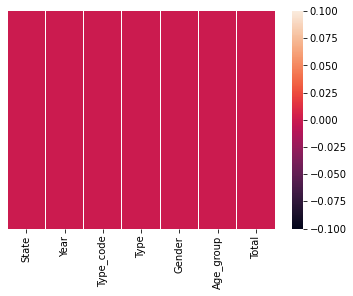

In [7]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [8]:
print(df.columns)

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')


In [11]:
X = df.drop('Type_code' , axis = 1) 
y = df['Type_code'] 

X.head(5)

,State,Year,Type,Gender,Age_group,Total
0,A & N Islands,2001,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Dowry Dispute,Female,0-14,0


In [13]:
df.to_csv("Suicides in India 2001-2012.csv", index=False)

In [14]:

df.dtypes
print(df.dtypes)

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [16]:
df.describe(include='all')

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Maharashtra,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


In [20]:
df[[ 'Year', 'Age_group']].describe()

,Year
count,237519.000000
mean,2006.500448
std,3.452240
min,2001.000000
25%,2004.000000
50%,2007.000000
75%,2010.000000
max,2012.000000


In [21]:

missing_data = df.isnull()
missing_data.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [22]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

State
False    237519
Name: State, dtype: int64

Year
False    237519
Name: Year, dtype: int64

Type_code
False    237519
Name: Type_code, dtype: int64

Type
False    237519
Name: Type, dtype: int64

Gender
False    237519
Name: Gender, dtype: int64

Age_group
False    237519
Name: Age_group, dtype: int64

Total
False    237519
Name: Total, dtype: int64



In [27]:
avg_suicides_loss = df["Year"].astype("float").mean(axis=0)
print("Average of Year:", avg_suicides_loss)

Average of Year: 2006.500448385182


In [34]:

numeric_features = [cols for cols in X.columns if (X[cols].dtype != 'O' and cols != 'Id')]

numeric_df = X[numeric_features]

numeric_df.head(5)

,Year,Total
0,2001,0
1,2001,0
2,2001,0
3,2001,0
4,2001,0


In [36]:

(numeric_df.isnull().sum() / len(numeric_df))

Year     0.0
Total    0.0
dtype: float64

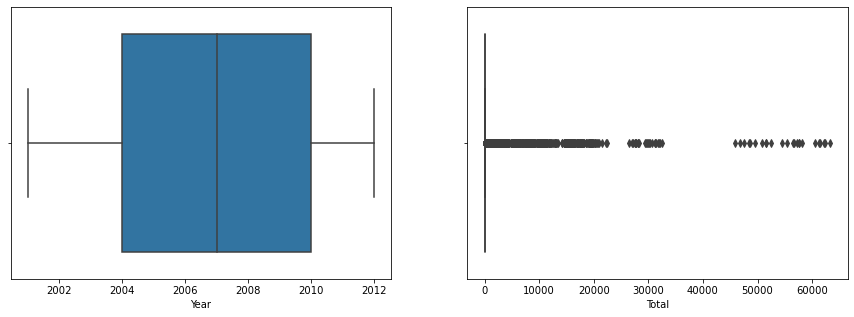

In [37]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(numeric_df['Year'])
plt.subplot(1,2,2)
sns.boxplot(numeric_df['Total'])
plt.show()

Text(0.5, 1.0, 'Suicides ')

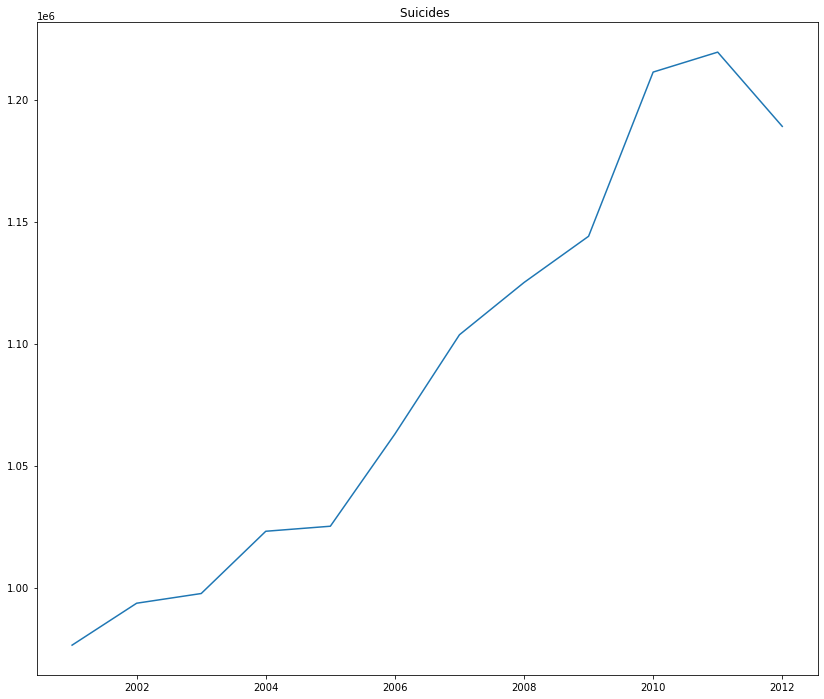

In [43]:
plt.figure(figsize=(14,12))
sns.lineplot(data=df.groupby('Year')['Total'].sum())
plt.title('Suicides ', fontsize='12')

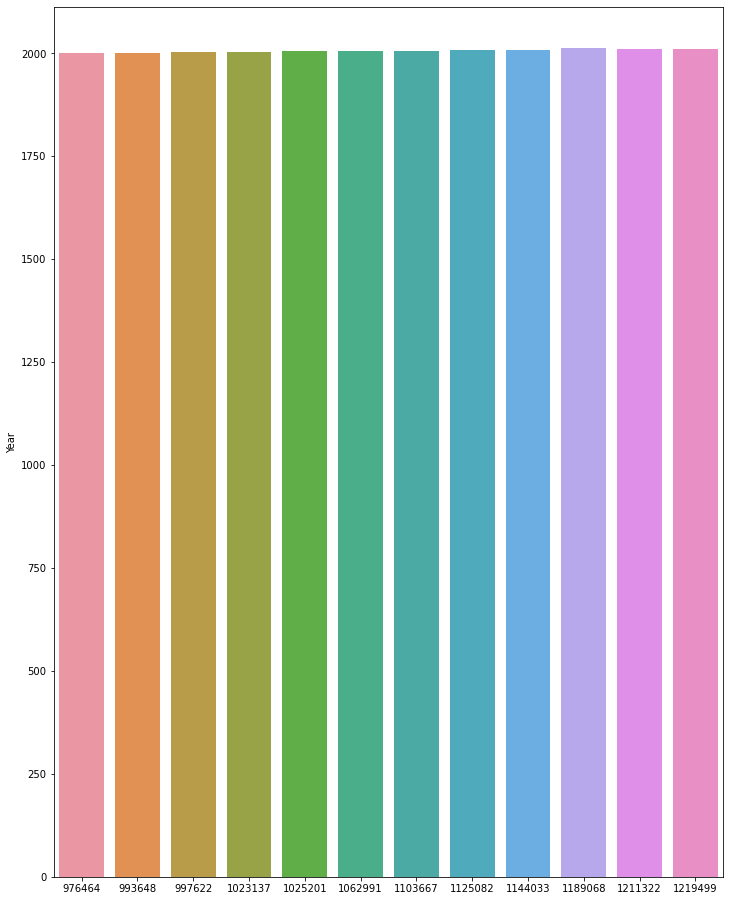

In [44]:
top_ten_reasons =df.groupby('Year')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,16))
sns.barplot(y=top_ten_reasons.index, x= top_ten_reasons.values)